In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

cancer = pd.read_csv('data/clean-data.csv', index_col=False)
cancer.drop('Unnamed: 0',axis=1, inplace=True)

In [2]:
print(cancer['diagnosis'])
#Printing the diagnosis column, which is either M=Malignenet or B=Benign

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [3]:
cancer.shape

#Shape of the Data which is 569 Rows and 30 Columns

(569, 31)

# *SPLITTING THE DATASET*

In [4]:
#Assign predictors to a variable of ndarray (matrix) type
array = cancer.values
X = array[:,1:31]
y = array[:,0]


In [5]:
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [6]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Call the transform method of LabelEncorder on two dummy variables
# le.transform (['M', 'B'])

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=5)



In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [10]:
x_train

array([[20.64, 17.35, 134.8, ..., 0.2112, 0.2689, 0.07055],
       [11.37, 18.89, 72.17, ..., 0.06203, 0.3267, 0.06994],
       [13.11, 22.54, 87.02, ..., 0.1126, 0.4128, 0.1076],
       ...,
       [17.91, 21.02, 124.4, ..., 0.1964, 0.3245, 0.1198],
       [15.78, 22.91, 105.7, ..., 0.2034, 0.3274, 0.1252],
       [9.876, 17.27, 62.92, ..., 0.05588, 0.2989, 0.0738]], dtype=object)

In [11]:
y_train

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [12]:
x_test

array([[15.3, 25.27, 102.4, ..., 0.2024, 0.4027, 0.09876],
       [12.34, 22.22, 79.85, ..., 0.08194, 0.2268, 0.09082],
       [14.5, 10.89, 94.28, ..., 0.1221, 0.2889, 0.08006],
       ...,
       [13.71, 18.68, 88.73, ..., 0.1284, 0.2849, 0.09031],
       [14.62, 24.02, 94.57, ..., 0.06946, 0.2522, 0.07246],
       [11.62, 18.18, 76.38, ..., 0.1416, 0.266, 0.0927]], dtype=object)

In [13]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# Model Training


# *Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm*

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [15]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
y_predict =knn_model.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [17]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot: >

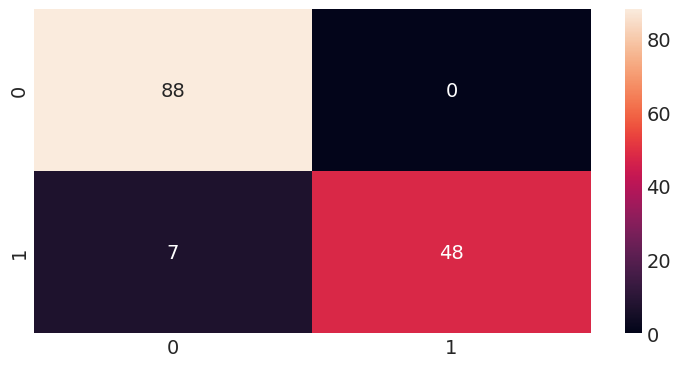

In [18]:
sns.heatmap(cm ,annot=True)

In [19]:
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_model.predict(x_test)))

Train set Accuracy:  0.9413145539906104
Test set Accuracy:  0.951048951048951


In [20]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        88
           1       1.00      0.87      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



### An accuracy of 95% has been achieved 

# *TRAINING THE MODEL USING SVM*

In [21]:
from sklearn.svm import SVC

In [22]:
from sklearn.metrics import classification_report , confusion_matrix

In [23]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

# *EVALUATING THE MODEL*


In [24]:
y_predict =svm_model.predict(x_test)

In [25]:
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [26]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot: >

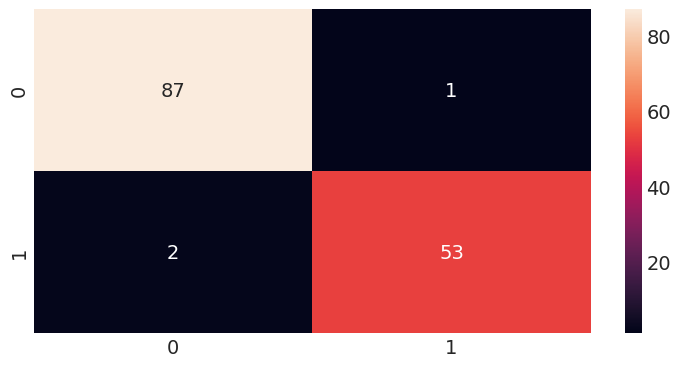

In [27]:
sns.heatmap(cm ,annot=True)

In [28]:
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, svm_model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, svm_model.predict(x_test)))

Train set Accuracy:  0.960093896713615
Test set Accuracy:  0.9790209790209791


In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.98      0.96      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



### Accuracy of 97% has been achieved 

# Decision Tree

In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_Df = clf.predict(x_test)


In [32]:

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Test set Accuracy:",metrics.accuracy_score(y_test, y_pred_Df))

print(classification_report(y_test,y_pred_Df))


Train set Accuracy:  0.9812206572769953
Test set Accuracy: 0.9370629370629371
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        88
           1       0.93      0.91      0.92        55

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### An accuracy of 93% has been achieved 